# Lifecycle of a Data Science Projects

Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
Feature Engineering---Handling Missing Values

# Feature Engineering

## Missing Values

# Why are their Missing values?? Survey--Depression Survey

They hesitate to put down the information

Survey informations are not that valid

Men--salary

Women---age

People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

# What are the different types of Missing Data?

## 1.Missing Completely at Random, MCAR:

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
null_rows = df[df['Age'].isnull() & df['Cabin'].isnull()] # Have relation ship

# Display the selected rows
null_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [12]:
null_rows = df[df['Age'].isnull() & df['Cabin'].isnull() & df['Embarked'].isnull()] 
# null_rows = df[df['Age'].isnull() & df['Embarked'].isnull()] 
# null_rows = df[df['Cabin'].isnull() & df['Embarked'].isnull()] # No relation ship between age and embarked or Cabin and embarked or al three
# Display the selected rows
null_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# 2.Missing Data Not At Random(MNAR): 
    
    Systematic missing ValuesThere is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [48]:
# Create the New Column where cabin values are missed If it is missed i otherwise o # convert in the form o's and 1's
df['Cabin_Null']=np.where(df['Cabin'].isnull(),1,0)


In [49]:
df[['Cabin_Null','Cabin']].head()

,Cabin_Null,Cabin
0,1,NaN
1,0,C85
2,1,NaN
3,0,C123
4,1,NaN


In [50]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_Null'],
      dtype='object')

In [51]:
# percentage of Missing Values
percentage_missing = df['Cabin_Null'].mean() * 100
print(f"Percentage of Cabin values are missing: {percentage_missing:.2f}%")
print("Percentage of Cabin values are missing: {:.2f}%".format(percentage_missing))

Percentage of Cabin values are missing: 77.10%
Percentage of Cabin values are missing: 77.10%


In [57]:
df.groupby('Survived')['Cabin']

In [56]:
df.groupby('Survived')['Cabin'].mean()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [62]:
df.groupby(['Survived'])['Cabin_Null'].mean()
# survived means 1  if not 0 
# In Survived 60 % are missing
# in Not survived 87% values are missing

Survived
0    0.876138
1    0.602339
Name: Cabin_Null, dtype: float64

In [59]:
df['Survived'].unique()

array([0, 1], dtype=int64)

# Missing At Random(MAR)

### All the techniques of handling ,Missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

In [64]:
df2=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [65]:
df2.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [66]:
df2.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

# Mean/ MEdian /Mode imputation
When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [79]:
def impute_median(data,feature,median):
    df2[feature+"_Median"]=df2[feature].fillna(median)

In [80]:
median=df['Age'].median()
median

28.0

In [81]:
impute_median(df2,'Age',median)
df2.head()

,Survived,Age,Fare,Age_Median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [82]:
df2.isnull().sum()

Survived        0
Age           177
Fare            0
Age_Median      0
dtype: int64

In [83]:
df[['Age','Age_Median']]

,Age,Age_Median
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,28.0
889,26.0,26.0


In [84]:
df[df['Age'].isnull()] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Null,Age_Median
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,28.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,28.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1,28.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1,28.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,1,28.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,1,28.0
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,1,28.0
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,1,28.0


In [86]:
df[df['Age'].isnull()][['Age', 'Age_Median']]

,Age,Age_Median
5,NaN,28.0
17,NaN,28.0
19,NaN,28.0
26,NaN,28.0
28,NaN,28.0
...,...,...
859,NaN,28.0
863,NaN,28.0
868,NaN,28.0
878,NaN,28.0


In [88]:
df[df['Age'].isnull()][['Age','Age_Median']].head()

,Age,Age_Median
5,NaN,28.0
17,NaN,28.0
19,NaN,28.0
26,NaN,28.0
28,NaN,28.0


In [90]:
print(df2['Age'].std())
print(df2['Age_Median'].std())

14.526497332334044
13.019696550973194


In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

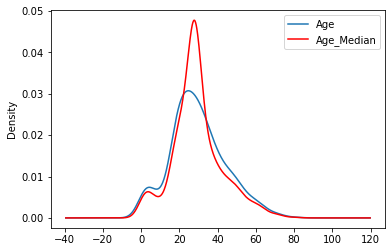

In [102]:
fig=plt.figure()
ax=fig.add_subplot(111)
df2['Age'].plot(kind='kde',ax=ax)
df2['Age_Median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Advantages And Disadvantages of Mean/Median Imputation

# Advantages

1. Easy to implement(Robust to outliers)

2. Faster way to obtain the complete dataset

# Disadvantages

1. Change or Distortion in the original variance
2. Impacts Correlation